In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
cols = ['id', 'cycle']
for i in range(1,4):
    cols.append('op'+str(i))
for i in range(1,24):
    cols.append('sensor'+str(i))
print(cols)

['id', 'cycle', 'op1', 'op2', 'op3', 'sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21', 'sensor22', 'sensor23']


In [3]:
train = pd.read_csv('train_FD001.txt', sep=' ', names=cols)
test = pd.read_csv('test_FD001.txt', sep=' ', names=cols)
testresults = pd.read_csv('RUL_FD001.txt', sep=' ', names=['rul', 'null'])

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
print(train.head())
print(test.head())
print(testresults.head())

   id  cycle     op1     op2    op3  sensor1  sensor2  sensor3  sensor4  \
0   1      1 -0.0007 -0.0004  100.0   518.67   641.82  1589.70  1400.60   
1   1      2  0.0019 -0.0003  100.0   518.67   642.15  1591.82  1403.14   
2   1      3 -0.0043  0.0003  100.0   518.67   642.35  1587.99  1404.20   
3   1      4  0.0007  0.0000  100.0   518.67   642.35  1582.79  1401.87   
4   1      5 -0.0019 -0.0002  100.0   518.67   642.37  1582.85  1406.22   

   sensor5  sensor6  sensor7  sensor8  sensor9  sensor10  sensor11  sensor12  \
0    14.62    21.61   554.36  2388.06  9046.19       1.3     47.47    521.66   
1    14.62    21.61   553.75  2388.04  9044.07       1.3     47.49    522.28   
2    14.62    21.61   554.26  2388.08  9052.94       1.3     47.27    522.42   
3    14.62    21.61   554.45  2388.11  9049.48       1.3     47.13    522.86   
4    14.62    21.61   554.00  2388.06  9055.15       1.3     47.28    522.19   

   sensor13  sensor14  sensor15  sensor16  sensor17  sensor18  senso

In [6]:
testresults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rul     100 non-null    int64  
 1   null    0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [7]:
train[train['id']==1]['cycle'].max()

192

In [8]:
testresults.drop('null', axis=1, inplace=True)
testresults['id'] = testresults.index+1
testresults.head()

,rul,id
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


In [9]:
testhighestrul = pd.DataFrame(data=test.groupby('id')['cycle'].max()).reset_index()
testhighestrul.head()

,id,cycle
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98


In [10]:
testresults['rulfailed'] = testresults['rul']+testhighestrul['cycle']
testresults.head()

,rul,id,rulfailed
0,112,1,143
1,98,2,147
2,69,3,195
3,82,4,188
4,91,5,189


In [11]:
testresults.drop('rul', axis=1, inplace=True)
test=test.merge(testresults,on=['id'],how='left')
test['remainingrul'] = test['rulfailed'] - test['cycle']

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13096 entries, 0 to 13095
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            13096 non-null  int64  
 1   cycle         13096 non-null  int64  
 2   op1           13096 non-null  float64
 3   op2           13096 non-null  float64
 4   op3           13096 non-null  float64
 5   sensor1       13096 non-null  float64
 6   sensor2       13096 non-null  float64
 7   sensor3       13096 non-null  float64
 8   sensor4       13096 non-null  float64
 9   sensor5       13096 non-null  float64
 10  sensor6       13096 non-null  float64
 11  sensor7       13096 non-null  float64
 12  sensor8       13096 non-null  float64
 13  sensor9       13096 non-null  float64
 14  sensor10      13096 non-null  float64
 15  sensor11      13096 non-null  float64
 16  sensor12      13096 non-null  float64
 17  sensor13      13096 non-null  float64
 18  sensor14      13096 non-nu

In [13]:
train['remainingrul'] = train.groupby('id')['cycle'].transform(max) - train['cycle']
train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,remainingrul
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN,187


In [14]:
rows = len(train.columns.difference(["cycle", "id", "remainingrul"]))

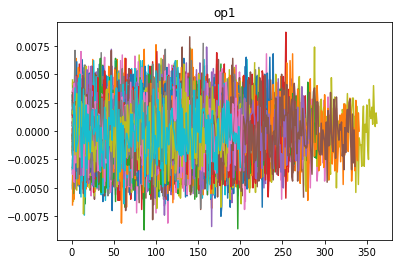

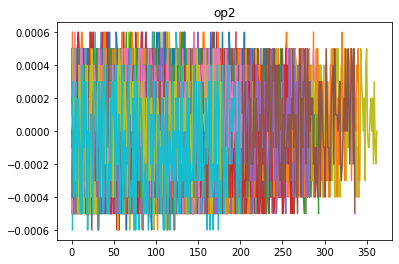

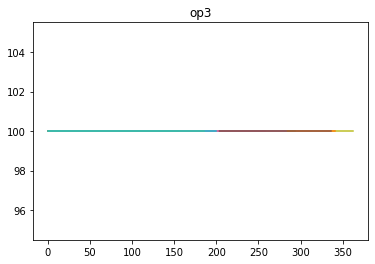

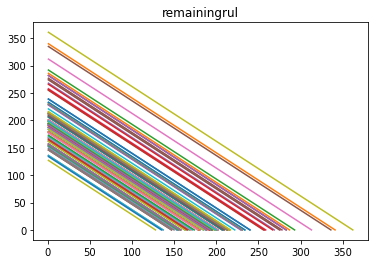

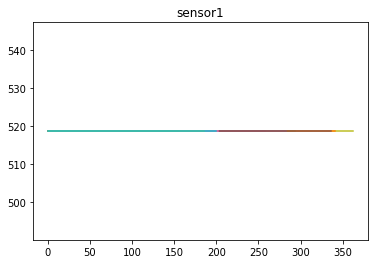

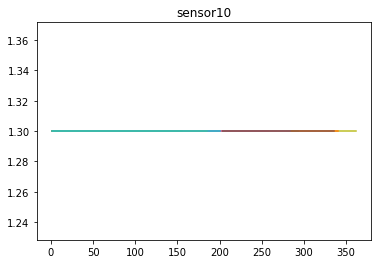

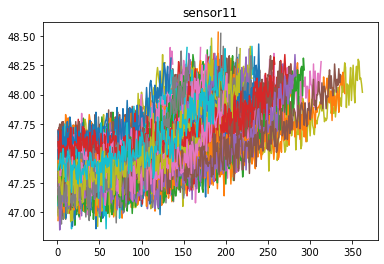

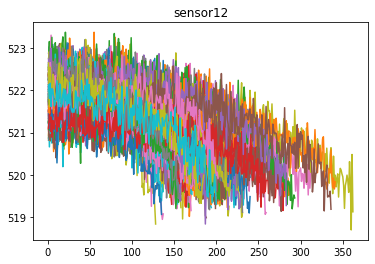

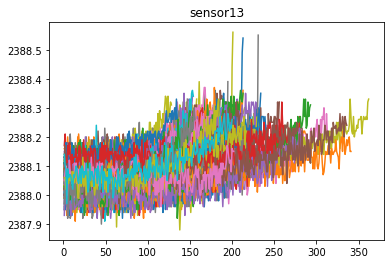

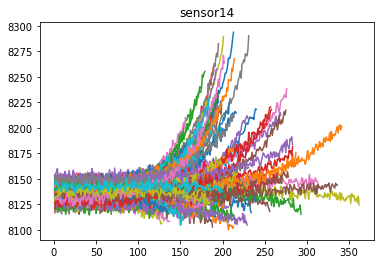

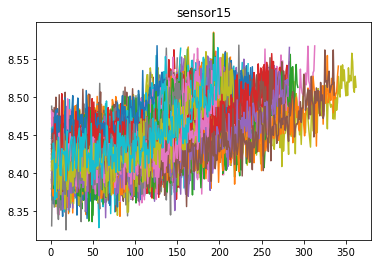

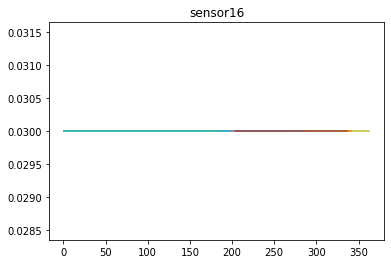

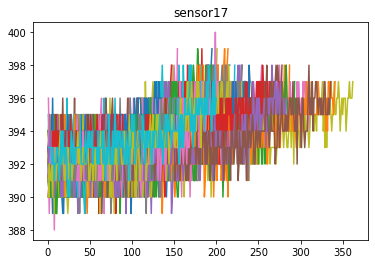

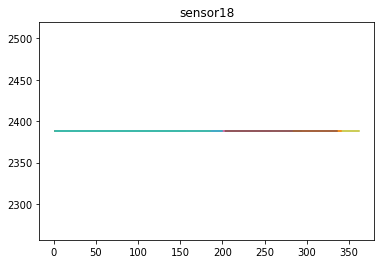

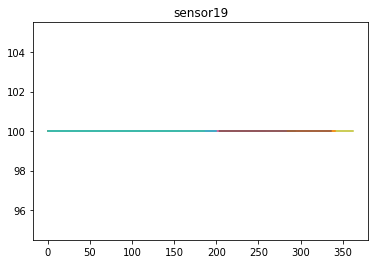

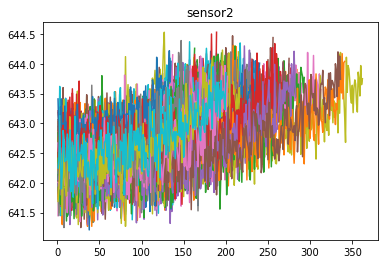

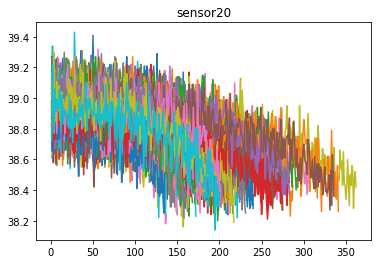

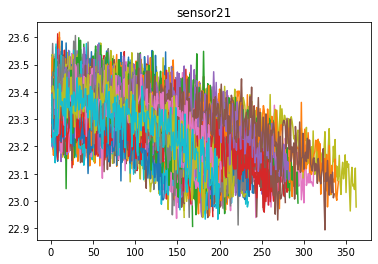

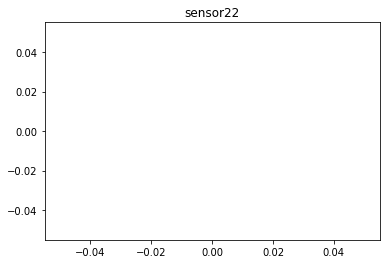

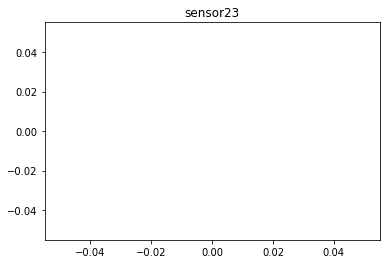

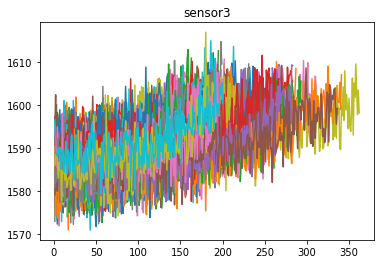

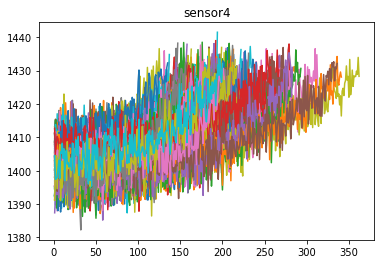

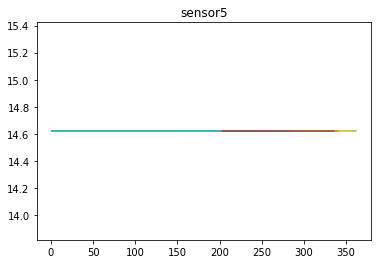

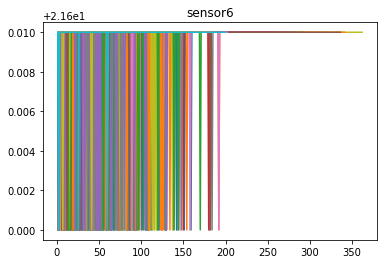

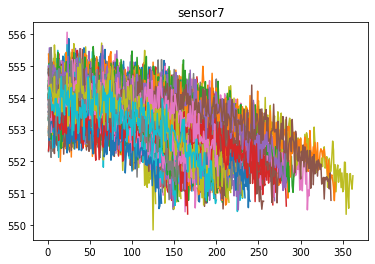

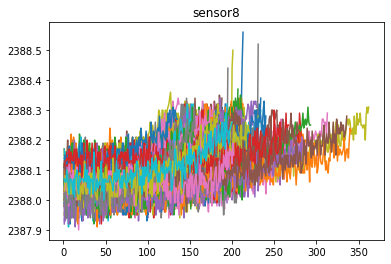

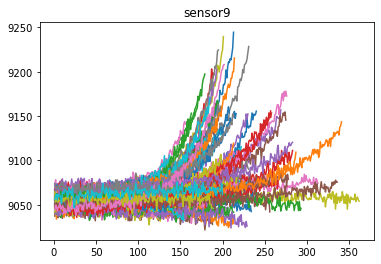

In [15]:
for c in train.columns.difference(['cycle', 'id']):
    for i in train['id'].unique():
        traincycle = train.query('id == @i')['cycle']
        trainc= train.query('id == @i')[c]
        plt.plot(traincycle, trainc)
        plt.title(c)
    plt.show()

In [16]:
cols_to_drop = ["op2", "op3", "sensor1", "sensor5", "sensor6",
                "sensor10", "sensor16", "sensor18", "sensor19", "sensor22", "sensor23"]
train.drop(cols_to_drop, axis=1, inplace=True)
test.drop(cols_to_drop, axis=1, inplace=True)
test.drop('rulfailed', axis=1, inplace=True)

In [17]:
train.head()

,id,cycle,op1,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,remainingrul
0,1,1,-0.0007,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


In [18]:
test.head()

,id,cycle,op1,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,remainingrul
0,1,1,0.0023,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,142
1,1,2,-0.0027,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,141
2,1,3,0.0003,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,140
3,1,4,0.0042,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,139
4,1,5,0.0014,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,138


In [19]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
for d in train, test:
    scalecols = d.columns.difference(['id', 'cycle', 'remainingrul'])
    norm.fit(d[scalecols])
    d[scalecols] = norm.transform(d[scalecols])

In [20]:
train.head()

,id,cycle,op1,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,remainingrul
0,1,1,-0.315980,-1.721725,-0.134255,-0.925936,1.121141,-0.516338,-0.862813,-0.266467,0.334262,-1.058890,-0.269071,-0.603816,-0.781710,1.348493,1.194427,191
1,1,2,0.872722,-1.061780,0.211528,-0.643726,0.431930,-0.798093,-0.958818,-0.191583,1.174899,-0.363646,-0.642845,-0.275852,-0.781710,1.016528,1.236922,190
2,1,3,-1.961874,-0.661813,-0.413166,-0.525953,1.008155,-0.234584,-0.557139,-1.015303,1.364721,-0.919841,-0.551629,-0.649144,-2.073094,0.739891,0.503423,189
3,1,4,0.324090,-0.661813,-1.261314,-0.784831,1.222827,0.188048,-0.713826,-1.539489,1.961302,-0.224597,-0.520176,-1.971665,-0.781710,0.352598,0.777792,188
4,1,5,-0.864611,-0.621816,-1.251528,-0.301518,0.714393,-0.516338,-0.457059,-0.977861,1.052871,-0.780793,-0.521748,-0.339845,-0.136018,0.463253,1.059552,187


In [21]:
test.head()

,id,cycle,op1,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,remainingrul
0,1,1,1.049295,1.359276,-0.561495,-0.975674,0.209138,-0.539078,-0.720312,-1.103591,-0.049542,-0.720590,-1.315031,-0.711659,-0.463406,-0.229408,0.448866,142
1,1,2,-1.220748,-1.908502,0.070116,-1.392836,1.603612,-1.061366,-0.348673,0.427727,0.736727,-0.193647,0.065977,-1.570037,0.347276,0.899934,0.664042,141
2,1,3,0.141278,-0.037636,-0.231698,-0.507676,0.517390,-0.364982,-0.126564,0.427727,0.397202,-0.720590,-0.868436,0.629340,0.347276,1.323438,0.961247,140
3,1,4,1.911912,-0.087526,-0.795350,0.251888,0.458675,-0.713174,-1.147041,-0.695239,-0.657113,-0.369295,-0.593609,-1.177045,-1.274088,0.758766,0.451244,139
4,1,5,0.640688,0.087088,-0.181729,-0.420954,0.590783,-1.061366,-1.211750,-0.542108,0.718857,-0.720590,-0.923402,-0.784053,-2.084769,0.688182,0.918450,138


In [22]:
def prevrecords(x, y, prevcount):
    outx = []
    outy = []
    for i in range(len(x)-prevcount-1): #eg 1000 - 50 -1 = range of 949, each loop will take series of 50
        temptimesteps = []
        for j in range(1, prevcount+1): # eg from 1 to 51 now so get 1 to index 50 values
            temptimesteps.append(x[[i+j+1], :]) #eg to get in series last 50 values starting from the first set of 50
        outx.append(temptimesteps)
        outy.append(y[i+prevcount+1]) #getting the value of highest one for the series of last 50
    return outx, outy

fts = 15
lasttimestepsserieslength = 50
xtr = []
ytr = []
for e in train['id'].unique():
    x = train[train["id"] == e].drop(['id', 'cycle', 'remainingrul'], axis = 1)
    y = train[train['id'] == e]['remainingrul']
    x, y = prevrecords(x.values, y.values, lasttimestepsserieslength)
    xtr.extend(x)
    ytr.extend(y)

In [23]:
print(np.array(xtr).shape)
print(np.array(ytr).shape)

(15531, 50, 1, 15)
(15531,)


In [24]:
xtr = np.array(xtr).reshape(np.array(xtr).shape[0], lasttimestepsserieslength, fts)
ytr = np.array(ytr)
print('xtr shape  ',xtr.shape)
print('ytr shape  ',ytr.shape)
print('xtr eg ', xtr[0])
print('ytr eg ', ytr.shape[0])

xtr shape   (15531, 50, 15)
ytr shape   (15531,)
xtr eg  [[-1.96187421 -0.66181262 -0.41316559 -0.52595315  1.00815526 -0.23458381
  -0.55713925 -1.0153033   1.36472069 -0.91984139 -0.55162928 -0.64914404
  -2.07309423  0.73989059  0.50342281]
 [ 0.32409042 -0.66181262 -1.26131421 -0.78483092  1.22282735  0.18804808
  -0.71382551 -1.53948899  1.96130213 -0.22459715 -0.52017567 -1.97166509
  -0.78170979  0.3525983   0.77779214]
 [-0.86461119 -0.62181592 -1.25152788 -0.30151835  0.71439345 -0.51633841
  -0.45705929 -0.97786146  1.0528713  -0.78079254 -0.52174835 -0.33984476
  -0.13601757  0.46325324  1.05955189]
 [-1.96187421 -1.16177148 -0.98729697 -1.1737031   1.47139503 -1.07984759
  -0.7047685  -1.42716349  0.36137918 -0.91984139 -0.57154989 -0.83579016
  -1.42740201  0.90587299  0.71312597]
 [ 0.46124829 -0.40183402  0.29308125 -1.2403669   1.09854351 -1.07984759
  -0.27682481 -0.67832678  1.229134   -0.91984139 -0.59933391 -1.19308415
  -0.78170979  1.56980262  0.81012523]
 [-1.550

In [25]:
xte = []
yte = []
for e in train['id'].unique():
    x = test[test["id"] == e].drop(['id', 'cycle', 'remainingrul'], axis = 1)
    y = test[test['id'] == e]['remainingrul']
    x, y = prevrecords(x.values, y.values, lasttimestepsserieslength)
    xte.extend(x)
    yte.extend(y)
xte = np.array(xte).reshape(np.array(xte).shape[0], lasttimestepsserieslength, fts)
yte = np.array(yte)
print('xte shape  ',xte.shape)
print('yte shape  ',yte.shape)
print('xte eg ', xte[0])
print('yte eg ', yte.shape[0])

xte shape   (8070, 50, 15)
yte shape   (8070,)
xte eg  [[ 0.27748057  1.25949687 -0.26567706  0.42533121 -0.77433408 -0.19088605
  -0.43874087 -0.08271249  0.30785313  0.33329611 -0.75163472 -0.83231469
  -1.2740876  -1.42933498  0.49523014]
 [-0.49433421 -0.13741583  0.48386079 -0.495714   -0.65690462  0.15730584
  -0.64510991  1.24442911 -0.28184813  0.33329611 -0.44539858  0.48110613
   1.96863928 -1.21758324  0.37872584]
 [-0.17652812  0.01225339 -1.00122353  0.16965145 -0.21654418  1.55007342
  -0.32418856  0.63190222 -0.6749823   0.33329611 -0.38258091  0.97062255
  -0.46340588 -0.58232804 -0.5996725 ]
 [ 0.18667884  0.26170208  0.20003579  0.28777251 -0.0404      0.50549774
  -0.42824753 -0.59315157  0.32572286  0.50894383 -0.65446364 -0.70476464
   1.15795756 -0.08824067 -0.31911113]
 [-0.40353247  0.4113713   0.82565005 -1.13416579 -0.64222594 -0.19088605
  -0.08983728  1.09129739  0.07554657  0.33329611 -1.13442991  0.62244538
  -0.46340588  0.40584671 -0.23470495]
 [ 1.50330

In [26]:
# Model
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.layers import Conv1D,MaxPooling1D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [27]:
def make_model(lr=0.001, drop_CNN=0, drop_dense=0.2, kernel_size=3):
    model = Sequential()
    intput_shape=(xtr.shape[1], xtr.shape[2])
    model.add(Conv1D(128, kernel_size=kernel_size, padding = "same", activation="relu", input_shape = intput_shape))
    model.add(Dropout(drop_CNN))
    model.add(MaxPooling1D(pool_size=2, padding='same'))
    model.add(Conv1D(128,kernel_size=kernel_size, padding = "same", activation="relu"))
    model.add(Dropout(drop_CNN))
    model.add(MaxPooling1D(pool_size=2, padding='same'))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(units = 128, return_sequences=True))
    model.add(LSTM(units = 128, return_sequences=False))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(drop_dense))
    model.add(Dense(1, activation = 'linear'))
    opt = keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss='mse')

    return model

In [28]:
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import GridSearchCV

# kerasregmodel = KerasRegressor(build_fn=make_model, epochs=100, batch_size=256)
# cnndrop = [0, 0.2]
# densedrop = [0.25, 0.5, 0.75]
# lr = [0.001, 0.01, 0.1]
# kernelsize = [3,5]

# params = dict(lr=lr, drop_CNN=cnndrop, drop_dense=densedrop, kernel_size=kernelsize)
# gridsearchcvmodel = GridSearchCV(estimator=kerasregmodel, param_grid=params, verbose=0, cv=5)
# gridsearchcvresult = gridsearchcvmodel.fit(xtr, ytr)
# print("Best: %f using %s" % (model.best_score_, model.best_params_))
# means = gridsearchcvmodel.cv_results_['mean_test_score']
# stds = gridsearchcvmodel.cv_results_['std_test_score']
# params = gridsearchcvmodel.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
49/49 - 17s - loss: 5850.4956 - val_loss: 5069.0913
Epoch 2/100
49/49 - 15s - loss: 3060.7024 - val_loss: 4638.1660
Epoch 3/100
49/49 - 16s - loss: 3041.2539 - val_loss: 4634.4331
Epoch 4/100
49/49 - 19s - loss: 2788.1162 - val_loss: 3359.9395
Epoch 5/100
49/49 - 19s - loss: 1467.1227 - val_loss: 2132.6387
Epoch 6/100
49/49 - 17s - loss: 1278.3916 - val_loss: 2029.8394
Epoch 7/100
49/49 - 17s - loss: 1212.2383 - val_loss: 1970.7484
Epoch 8/100
49/49 - 16s - loss: 1188.6095 - val_loss: 1959.0264
Epoch 9/100
49/49 - 17s - loss: 1243.6544 - val_loss: 1947.0164
Epoch 10/100
49/49 - 16s - loss: 1214.9036 - val_loss: 1944.4501
Epoch 11/100
49/49 - 15s - loss: 1180.9137 - val_loss: 1908.7588
Epoch 12/100
49/49 - 16s - loss: 1189.7922 - val_loss: 1899.5530
Epoch 13/100
49/49 - 20s - loss: 1179.4723 - val_loss: 1887.5580
Epoch 14/100
49/49 - 18s - loss: 1154.2095 - val_loss: 1868.5873
Epoch 15/100
49/49 - 17s - loss: 1137.6931 - val_loss: 1826.6107
Epoch 16/100
49/49 - 16s - loss: 1

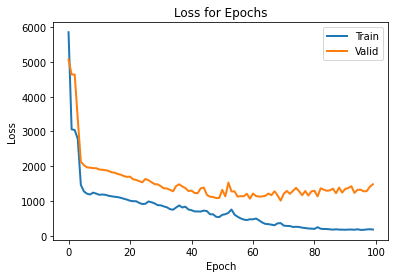

In [29]:
model = make_model(lr=0.001, drop_CNN=0, drop_dense= 0.5, kernel_size=3)
history = model.fit(xtr, ytr, epochs=100, batch_size=256, validation_split=0.2,
                    shuffle=False, 
                    use_multiprocessing=True, verbose=2)

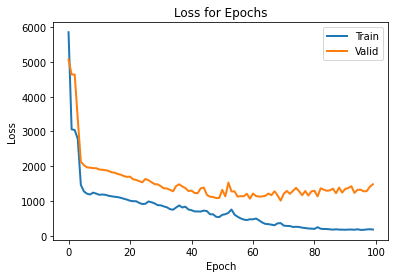

In [30]:
plt.plot(history.history['loss'], linewidth=2, label='Train')
plt.plot(history.history['val_loss'], linewidth=2, label='Valid')
plt.legend(loc='upper right')
plt.title('Loss for Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [34]:
ypr = model.predict(xte)
ypr = ypr.reshape(ypr.shape[0])
print('RMSE ', np.mean(np.square(ypr - yte))**0.5)

RMSE  47.07641325645383


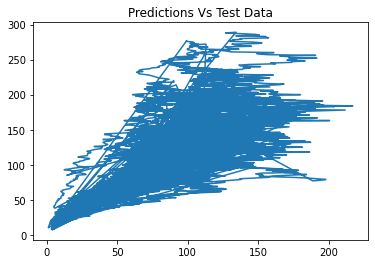

In [36]:
plt.plot(ypr, yte)
plt.title('Predictions Vs Test Data')
plt.show()